In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('final_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,cases
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,2
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,0.0,1025,22,10,99,18,2016,4,0


In [3]:
df.shape

(174103, 25)

In [4]:
# Total no of duplicate rows
df.duplicated().sum()

71058

In [5]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [6]:
df.shape

(103045, 25)

In [7]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'year', 'month', 'cases'],
      dtype='object')

## Feature Scaling 

In [8]:
feature_scale = [feature for feature in df.columns if feature in ['density_per_km','precipMM']]

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [10]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['cases','latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'year', 'month']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

In [11]:
data.head()

,cases,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,density_per_km,precipMM
0,2,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
1,0,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
2,1,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
3,0,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,4,0.505636,0.0
4,1,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,4,0.505636,0.0


In [12]:
X = data.iloc[:,1:]  #independent columns
y = data['cases'] #dependent column

## 1. ExtraTreesRegressor

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
model.feature_importances_

array([8.80595923e-02, 1.15904700e-01, 4.23924514e-02, 4.16295624e-02,
       3.56689505e-06, 3.59643744e-02, 2.55952427e-02, 3.27664021e-02,
       3.44900325e-02, 2.52540519e-02, 2.58364010e-02, 2.84362150e-02,
       3.55005728e-02, 3.02584583e-02, 3.82704210e-02, 3.29109228e-02,
       4.32352383e-02, 1.09620740e-02, 4.05159595e-02, 4.24550602e-02,
       3.13658064e-02, 7.52795211e-02, 1.09032965e-01, 1.38804084e-02])

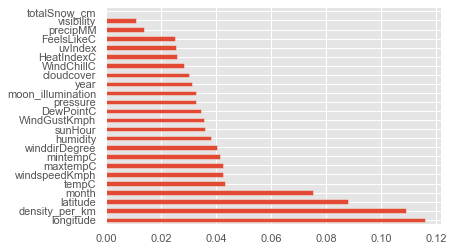

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

In [16]:
print(feat_importances.nlargest(24))

longitude            0.115905
density_per_km       0.109033
latitude             0.088060
month                0.075280
tempC                0.043235
windspeedKmph        0.042455
maxtempC             0.042392
mintempC             0.041630
winddirDegree        0.040516
humidity             0.038270
sunHour              0.035964
WindGustKmph         0.035501
DewPointC            0.034490
pressure             0.032911
moon_illumination    0.032766
year                 0.031366
cloudcover           0.030258
WindChillC           0.028436
HeatIndexC           0.025836
uvIndex              0.025595
FeelsLikeC           0.025254
precipMM             0.013880
visibility           0.010962
totalSnow_cm         0.000004
dtype: float64


## 2. Infromation gain

In [17]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X,y)

In [18]:
mutual_data = pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

latitude             0.796310
longitude            0.777184
density_per_km       0.765947
year                 0.117770
DewPointC            0.057544
WindChillC           0.056737
mintempC             0.055315
FeelsLikeC           0.052293
HeatIndexC           0.049119
sunHour              0.045556
uvIndex              0.041651
month                0.041551
tempC                0.040122
maxtempC             0.038905
winddirDegree        0.034083
windspeedKmph        0.028434
visibility           0.026378
pressure             0.025316
WindGustKmph         0.022445
humidity             0.020497
moon_illumination    0.009188
cloudcover           0.009043
precipMM             0.004422
totalSnow_cm         0.002229
dtype: float64

<AxesSubplot:>

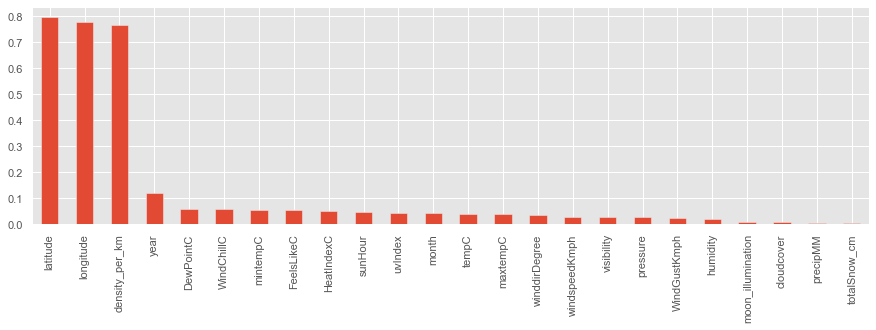

In [19]:
mutual_data.sort_values(ascending=False).plot.bar(figsize=(15,4))

In [20]:
from sklearn.feature_selection import SelectKBest
select_col = SelectKBest(mutual_info_classif,k=24)
select_col.fit(X,y)
X.columns[select_col.get_support()]

Index(['latitude', 'longitude', 'maxtempC', 'mintempC', 'totalSnow_cm',
       'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'year', 'month', 'density_per_km', 'precipMM'],
      dtype='object')

## 3. XGBoost

[0.08705066 0.04595809 0.1057868  0.03554714 0.00052974 0.06100857
 0.02503796 0.03938714 0.0569014  0.02681976 0.00184903 0.0485249
 0.04987788 0.06957405 0.06618369 0.01156525 0.         0.00360178
 0.06551453 0.00821301 0.08613496 0.03655047 0.05958752 0.00879563]


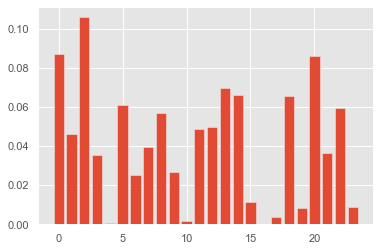

In [22]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBRegressor
from matplotlib import pyplot

# fit model no training data
model = XGBRegressor()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [23]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)

maxtempC             0.105787
latitude             0.087051
year                 0.086135
cloudcover           0.069574
humidity             0.066184
winddirDegree        0.065515
sunHour              0.061009
density_per_km       0.059588
DewPointC            0.056901
WindGustKmph         0.049878
WindChillC           0.048525
longitude            0.045958
moon_illumination    0.039387
month                0.036550
mintempC             0.035547
FeelsLikeC           0.026820
uvIndex              0.025038
pressure             0.011565
precipMM             0.008796
windspeedKmph        0.008213
visibility           0.003602
HeatIndexC           0.001849
totalSnow_cm         0.000530
tempC                0.000000
dtype: float32

<AxesSubplot:>

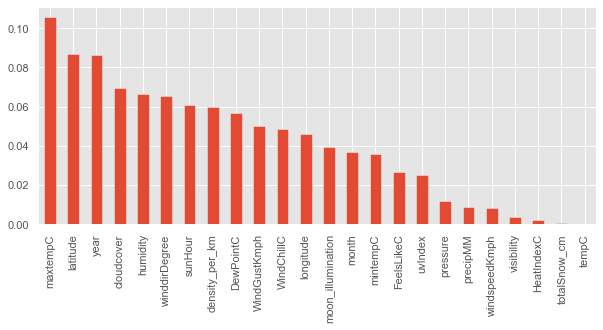

In [24]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)
feat_importance.sort_values(ascending=False).plot.bar(figsize=(10,4))

In [25]:
len(df.columns)

25